In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%pylab inline
pylab.rcParams['figure.figsize'] = (15.0, 10.0)
matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':22})#,'font.family': 'serif'})
import os
#os.environ['PROJ_LIB'] = '/home/weiszr/anaconda3/share/proj'
from clawpack.visclaw.JSAnimation import IPython_display
import clawpack.visclaw.JSAnimation.JSAnimation_frametools as J
from clawpack.clawutil import nbtools
import clawpack.visclaw.JSAnimation.JSAnimation_frametools as J
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


In [8]:
from clawpack.geoclaw import fgmax_tools, geoplot
from clawpack.pyclaw import Solution
import os
import pygmt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy


In [15]:
ds = xr.open_dataset('chincoteague/ncei19_n38x25_w075x25_2019v1.grd')
ds

<xarray.Dataset>
Dimensions:       (grid_mapping: 12, x: 8112, y: 8112)
Coordinates:
  * x             (x) float64 -75.25 -75.25 -75.25 -75.25 ... -75.0 -75.0 -75.0
  * y             (y) float64 38.0 38.0 38.0 38.0 ... 38.25 38.25 38.25 38.25
  * grid_mapping  (grid_mapping) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
Data variables:
    z             (y, x) float32 ...
Attributes:
    Conventions:  COARDS, CF-1.5
    title:        Produced by grdconvert
    history:      grdconvert ncei19_n38x25_w075x25_2019v1.tif ncei19_n38x25_w...
    description:  
    GMT_version:  5.4.5 [64-bit] [MP]
    node_offset:  1

In [3]:
file_path = os.path.join('/mnt/c/storm/v6/s00') 

solution = Solution()

drytol_default = .001
x = Solution(4, file_format='ascii')
patches = []
patch_dict = {}
for stateno, state in enumerate(x.states):
    state = x.states[stateno]
    patch = state.patch
    patches.append(patch.patch_index)
    level = patch.level
#     print(stateno, patch.level)
    Xc, Yc = state.grid.c_centers
    xc = Xc[:,0]
    yc = Yc[0,:]
    h = state.q[0,:,:]
    eta = state.q[3,:,:]
    topo = eta - h
    # water = np.ma.masked_where(h <= drytol_default, eta)
    water = eta
    ind=np.where(h<=drytol_default)
    nan_index = np.where(eta <=.001)
    water[ind]=np.nan

    land = np.ma.masked_where(h > drytol_default, eta)
    long=Xc[:,0]
    lat = Yc[0]
    patch_dict[stateno] = {"lat": lat, 'long':long, 'eta':eta}


False
True
False
False
False
True
False
True
False
False
False
False


In [46]:
patch_dict

{0: {'lat': array([20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5,
         31.5]),
  'long': array([-98.5, -97.5, -96.5, -95.5, -94.5, -93.5, -92.5, -91.5, -90.5,
         -89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
         -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
         -71.5, -70.5]),
  'eta': array([[1.45369872e-01, 1.42944464e-01, 1.39659196e-01, 1.37733586e-01,
          1.41759715e-01, 1.48459708e-01, 1.55874480e-01, 1.63731451e-01,
          1.72106841e-01, 1.78813175e-01, 2.77733889e+01, 5.72399475e+01],
         [1.43673578e-01, 1.41019772e-01, 1.37515667e-01, 1.36326706e-01,
          1.40793811e-01, 1.47536591e-01, 1.54934401e-01, 1.62737363e-01,
          1.72169482e-01, 1.80330179e-01, 2.77733889e+01, 5.72399475e+01],
         [1.41453858e-01, 1.38503312e-01, 1.34674554e-01, 1.34046734e-01,
          1.38978852e-01, 1.46048728e-01, 1.53631177e-01, 1.61846990e-01,
          1.73275509e-01, 1.84719812e-01, 2.7773

In [8]:
xlow = state.grid.x.lower
ylow = state.grid.y.lower
mx = state.grid.x.num_cells
my = state.grid.y.num_cells
dx = state.grid.x.delta
dy = state.grid.y.delta
print(xlow, mx, dx, ylow, my, dy)
len(patches)

-74.25 22 0.0625 30.875 20 0.0625


6

grdimage [WARNING]: Your grid y's or latitudes appear to be outside the map region and will be skipped.
grdimage [WARNING]: No grid or image inside plot domain
grdimage [WARNING]: Your grid y's or latitudes appear to be outside the map region and will be skipped.
grdimage [WARNING]: No grid or image inside plot domain
grdimage [WARNING]: Your grid y's or latitudes appear to be outside the map region and will be skipped.
grdimage [WARNING]: No grid or image inside plot domain
grdimage [WARNING]: Your grid y's or latitudes appear to be outside the map region and will be skipped.
grdimage [WARNING]: No grid or image inside plot domain


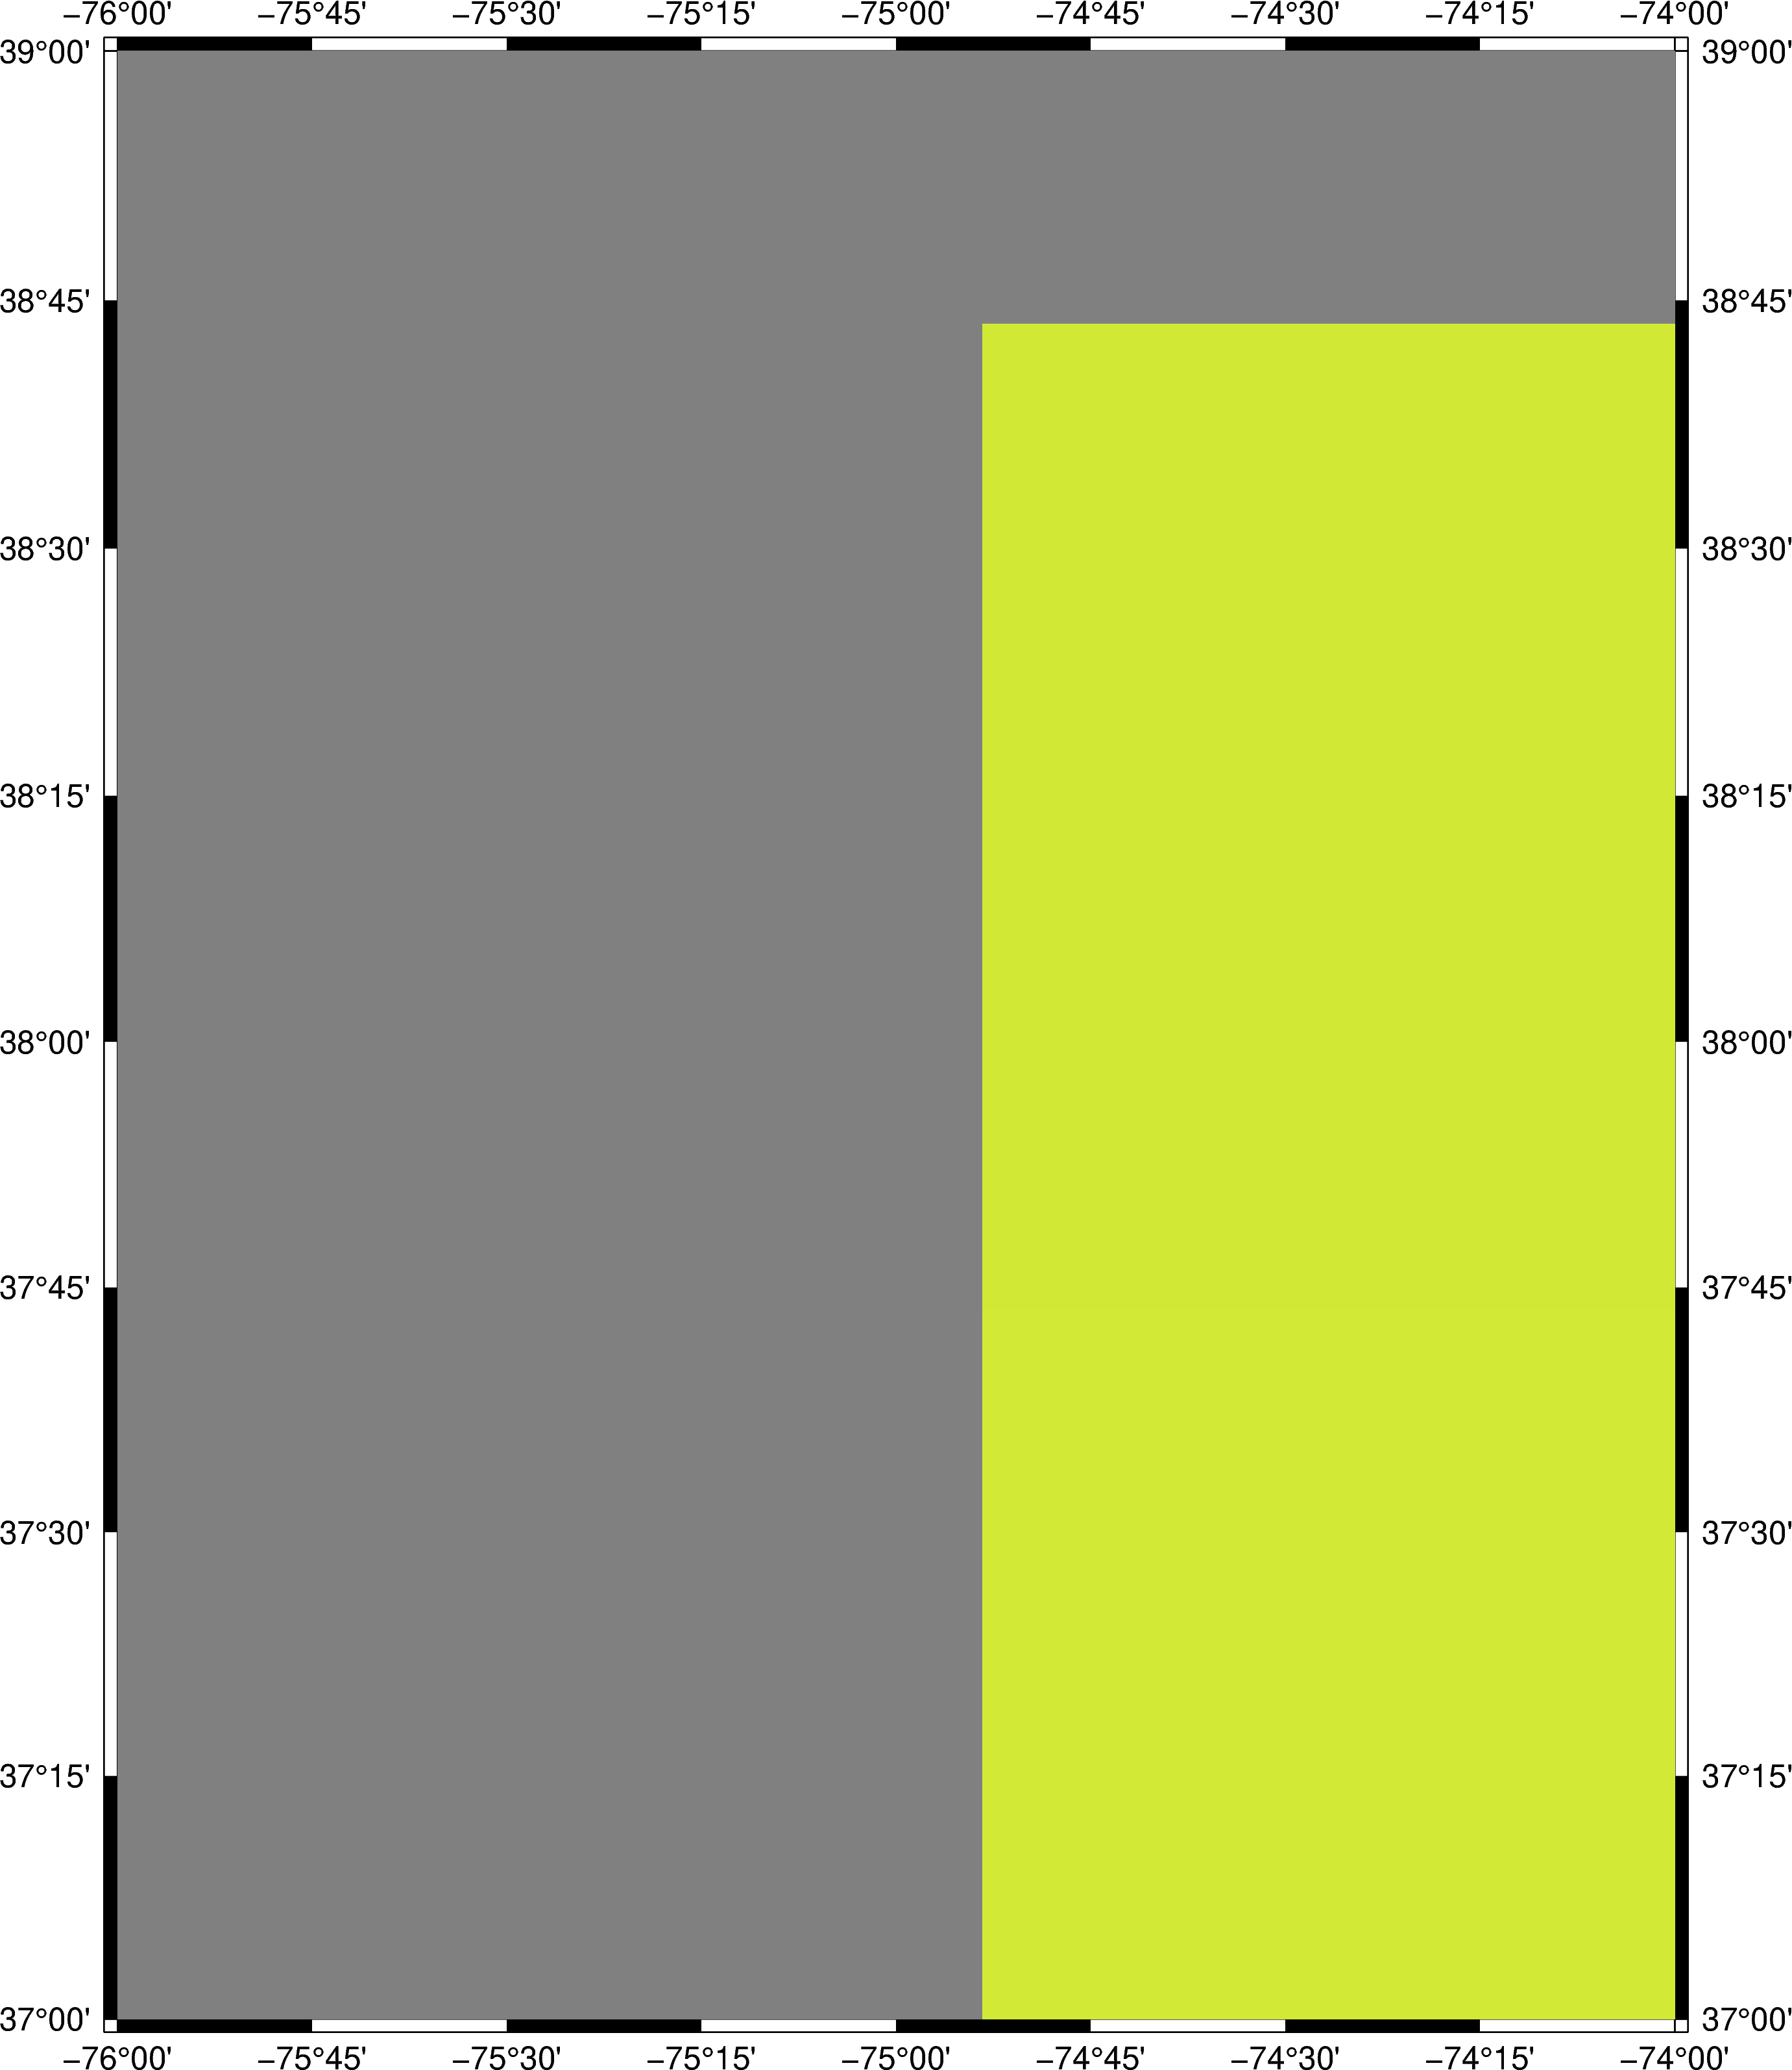

In [6]:
fig = pygmt.Figure()
fig.basemap(region=[-76.0, -74.0, 37., 39.0], projection='M8i',frame='a')
path = 'chincoteague'
file = os.path.join(path,'ncei19_n38x00_w075x50_2019v1.grd' )
file2 = os.path.join(path, 'ncei19_n38x25_w075x50_2019v1.grd')
file3 = os.path.join(path, 'ncei19_n38x25_w075x25_2019v1.grd')

# pygmt.makecpt(series=[-50, 50], cmap='wiki-france')

fig.grdimage(file)
fig.grdimage(file2)
fig.grdimage(file3)

# fig.basemap(region=[-75.5, -75.08, 37.80, 38.25], projection='M8i',frame='a')
# fig.grdimage('/mnt/c/Projects/barrier_island/bathy/synthetic_island.tt3')
for patch in patch_dict:
    
    lat = patch_dict[patch]['lat']
    
    long = patch_dict[patch]['long']
    
    eta = patch_dict[patch]['eta']
#     print(patch, lat.min(), lat.max(), long.min(),long.max, eta.min(), eta.max())
    df = pd.DataFrame(data=eta, index=[i for i in long], columns=[i for i in lat])# 'Latitude':lat, 'Longitude':long})
    df.index.name='Longitude'
    df.columns.name="Latitude"
    da=xr.DataArray(data=df.T)
    
#     print(np.isnan(eta).any())
    fig.grdimage(da)
fig.show()
# da
# fig.grdimage(da)
# fig.show()
# fig = pygmt.Figure()
# fig.basemap(region=[xlow, xlow+(dx*mx), ylow, ylow+(dy*my)], projection='M8i', frame='a')
# fig.coast(shorelines=True)
# fig.show()

this_level = patch.level

                        xc_centers,yc_centers = patch.grid.c_centers
                        mask_coarse = np.empty(xc_centers.shape, dtype=bool)
                        mask_coarse.fill(False)

                        # iterate over all grids to see which one masks this grid
                        for stateno_fine,state_fine in enumerate(framesoln.states):
                            # iterate over all patches, and find any finer level grids that are
                            # sitting on top of this patch/grid/state.
                            patch_fine = state_fine.patch

                            # Only look at patches one level finer
                            if patch_fine.level != this_level+1:
                                continue

                            xlower_fine = patch_fine.dimensions[0].lower
                            xupper_fine = patch_fine.dimensions[0].upper
                            ylower_fine = patch_fine.dimensions[1].lower
                            yupper_fine = patch_fine.dimensions[1].upper

                            m1 = (xc_centers > xlower_fine) & (xc_centers < xupper_fine)
                            m2 = (yc_centers > ylower_fine) & (yc_centers < yupper_fine)

                            # Mask all fine grid regions
                            mask_coarse = (m1 & m2) | mask_coarse


In [29]:
for patch in patch_dict:
    
    lat = patch_dict[patch]['lat']
    
    long = patch_dict[patch]['long']
    
    eta = patch_dict[patch]['eta']
ccrs?


In [1]:
ax = plt.axes(projection=ccrs.PlateCarree())
img_extent = (-76, -70, 28, 34)
ax.set_global()
# ax.coastlines(extent=img_extent)

# ax.contourf(lon, lat, data)


# import numpy as np
# lon = np.linspace(-80, 80, 25)
# lat = np.linspace(30, 70, 25)
# lon2d, lat2d = np.meshgrid(lon, lat)
# data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
ax.contourf(da)



NameError: name 'plt' is not defined

In [64]:
# for i in range(mx):
long=Xc[:,0]
lat = Yc[0]
df = pd.DataFrame(data=eta, index=[i for i in long], columns=[i for i in lat])# 'Latitude':lat, 'Longitude':long})
df.index.name='Longitude'
df.columns.name="Latitude"
df.T

Longitude,-98.998437,-98.995312,-98.992188,-98.989063,-98.985938,-98.982812,-98.979687,-98.976562,-98.973438,-98.970313,...,-98.917187,-98.914062,-98.910938,-98.907813,-98.904688,-98.901562,-98.898438,-98.895313,-98.892188,-98.889063
Latitude,,,,,,,,,,,,,,,,,,,,,
29.226562,0.178287,0.178284,0.178281,0.178277,0.178274,0.178271,0.178268,0.178265,0.178262,0.178260,...,0.178214,0.178211,0.178209,0.178207,0.178204,0.178202,0.178200,0.178197,0.178195,0.178193
29.229688,0.178316,0.178312,0.178309,0.178306,0.178303,0.178300,0.178297,0.178294,0.178291,0.178288,...,0.178242,0.178240,0.178237,0.178235,0.178233,0.178230,0.178228,0.178226,0.178223,0.178221
29.232813,0.178345,0.178342,0.178338,0.178335,0.178332,0.178329,0.178326,0.178323,0.178320,0.178317,...,0.178271,0.178269,0.178266,0.178264,0.178261,0.178259,0.178257,0.178255,0.178252,0.178250
29.235938,0.178374,0.178371,0.178368,0.178365,0.178361,0.178358,0.178355,0.178352,0.178349,0.178346,...,0.178300,0.178298,0.178295,0.178293,0.178290,0.178288,0.178286,0.178284,0.178281,0.178279
29.239063,0.178403,0.178400,0.178397,0.178394,0.178390,0.178387,0.178384,0.178381,0.178378,0.178375,...,0.178329,0.178326,0.178324,0.178322,0.178319,0.178317,0.178315,0.178312,0.178310,0.178308
29.242188,0.178432,0.178429,0.178426,0.178423,0.178420,0.178416,0.178413,0.178410,0.178407,0.178404,...,0.178358,0.178355,0.178353,0.178350,0.178348,0.178346,0.178343,0.178341,0.178339,0.178337
29.245313,0.178461,0.178458,0.178455,0.178452,0.178449,0.178445,0.178442,0.178439,0.178436,0.178433,...,0.178387,0.178384,0.178382,0.178379,0.178377,0.178375,0.178372,0.178370,0.178368,0.178365
29.248438,0.178491,0.178487,0.178484,0.178481,0.178478,0.178474,0.178471,0.178468,0.178465,0.178462,...,0.178415,0.178413,0.178410,0.178408,0.178406,0.178403,0.178401,0.178399,0.178396,0.178394
29.251563,0.178520,0.178516,0.178513,0.178510,0.178507,0.178504,0.178500,0.178497,0.178494,0.178491,...,0.178444,0.178442,0.178439,0.178437,0.178434,0.178432,0.178430,0.178427,0.178425,0.178423


In [ ]:

# R = '-R-99/-70/8/32'
# map_cpt = '-C/Users/jeffriesc/Research_Stuff/PreClaw/MapTools/AGUPosterGMT/wiki-france.cpt'
# water_cpt = '-Cland-water11.cpt'
# J = '-JM3.0i'

# subprocess.run([gmt, 'psbasemap', R, J, '-K'
#                  '-BneSW', '-Bxa5f1', '-Bya5f1', '>', 'test.ps'])
# subprocess.run([gmt, 'grdimage', '/Users/jeffriesc/Data/World/Bathy/entire_world_srtm15_new.grd',
#                 R, '-JM3.0i',  map_cpt,'-K','-O', '>>', 'test.ps'])
# subprocess.run([gmt, 'pscoast', R, J, '-Dh', '-O', '-Cblue', '-Ir/.25,cyan', '-Na', '-t75', '-W', '-K', '>>', 'test.ps'])

# for i in range(1):
#
#     name = 'test_{}'.format(i)
#     name2 = 'topo_{}'.format(i)
#     file = name + '.txt'
#     file2 = name + '.txt'
#     # f2 = 'test_grd_info{}'.format(i)
#     # f2_name = f2 + '.txt'
#     I = '-I20m'
#     subprocess.run([gmt, 'xyz2grd', '-G{}.grd'.format(name), '{}'.format(file), I, '-D0invalid',
#                     R])
#     # subprocess.run([gmt, 'xyz2grd', '-G{}.grd'.format(name2), '{}'.format(file2), I, '-D0'
#     #                 R])
#     # subprocess.run([gmt, 'makecpt', '-Cpolar', '-T-1/1' '>', 'tsunami.cpt'])
#     subprocess.run([gmt, 'grdimage', '{}.grd'.format(name),J ,R,'-O', '-Q',
#                     water_cpt,'-K', '>>', 'test.ps' ])
#     # subprocess.run([gmt, 'grdimage', '{}.grd'.format(name2), '-JM3.0i', R, '-O', '-Q'
#     #                                 '-Cwiki-france', '-K', '>>', 'test.ps'])
# for i in range(2, 5):
#
#     name = 'test_{}'.format(i)
#     file = name + '.txt'
#     # f2 = 'test_grd_info{}'.format(i)
#     # f2_name = f2 + '.txt'
#     I = '-I5m'
#     subprocess.run([gmt, 'xyz2grd', '-G{}.grd'.format(name), '{}'.format(file), I,
#                     R])
#     # subprocess.run([gmt, 'makecpt', '-Cpolar', '-T-1/1' '>', 'tsunami.cpt'])
#     subprocess.run([gmt, 'grdimage', '{}.grd'.format(name), '-Q',J ,R,'-O',
#                     water_cpt,'-K', '>>', 'test.ps' ])
#
# for i in range(5,69):
#
#     name = 'test_{}'.format(i)
#     file = name + '.txt'
#     # f2 = 'test_grd_info{}'.format(i)
#     # f2_name = f2 + '.txt'
#     I = '-I1m'
#     subprocess.run([gmt, 'xyz2grd', '-G{}.grd'.format(name), '{}'.format(file), I,
#                     R])
#     # subprocess.run([gmt, 'makecpt', '-Cpolar', '-T-1/1' '>', 'tsunami.cpt'])
#     subprocess.run([gmt, 'grdimage', '{}.grd'.format(name), '-Q',J ,R,'-O',
#                     water_cpt,'-K', '>>', 'test.ps' ])
#
# for i in range(69,1093):
#
#     name = 'test_{}'.format(i)
#     file = name + '.txt'
#     # f2 = 'test_grd_info{}'.format(i)
#     # f2_name = f2 + '.txt'
#     I = '-I10s'
#     subprocess.run([gmt, 'xyz2grd', '-G{}.grd'.format(name), '{}'.format(file), I,
#                     R])
#     # subprocess.run([gmt, 'makecpt', '-Cpolar', '-T-1/1' '>', 'tsunami.cpt'])
#     subprocess.run([gmt, 'grdimage', '{}.grd'.format(name), '-Q',J ,R,'-O',
#                     water_cpt,'-K', '>>', 'test.ps' ])

# subprocess.run([gmt, 'psscale', '-D.05/-1.85+w7.5c/.5c+h', '-Bxaf+lSlip (m)',
#                 '-C/Users/jeffriesc/Data/NA_CAS/CPT/central.cpt', '-O','>>', 'test.ps'])


